### Import

In [ ]:
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Final Visualization

In [ ]:
df1 = pd.read_csv("data/modi_tweets.csv")
df2=pd.read_csv("data/rahul_tweets.csv")

In [ ]:
df1

,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,neg
1,1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pos
4,4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,pos
...,...,...,...,...,...
25683,25678,2019-04-09 12:06:31+00:00,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,pos
25684,25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I am seriously worried about future of Indian ...,pos
25685,25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,neg
25686,25681,2019-03-23 05:06:36+00:00,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",neg


In [ ]:
df1["target"] = pd.Series(["Narendra Modi" for x in range(len(df1.index))])

In [ ]:
df1.to_csv("modifinal.csv",index=None)

In [ ]:
df1

,Unnamed: 0,Date,User,Tweet,Emotion,target
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,neg,Narendra Modi
1,1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,neg,Narendra Modi
2,2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,neg,Narendra Modi
3,3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pos,Narendra Modi
4,4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,pos,Narendra Modi
...,...,...,...,...,...,...
25683,25678,2019-04-09 12:06:31+00:00,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,pos,Narendra Modi
25684,25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I am seriously worried about future of Indian ...,pos,Narendra Modi
25685,25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,neg,Narendra Modi
25686,25681,2019-03-23 05:06:36+00:00,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",neg,Narendra Modi


In [ ]:
df1["User"].value_counts()

LaksshyaAdvani     136
umakantsingh_IN    134
kumardurgesh262    121
indiatvnews        111
INCdilse           110
                  ... 
LavanyaBallal        1
Biswajeet_12         1
Rajdeep03039214      1
BharaliHirok         1
parthajit0101        1
Name: User, Length: 14116, dtype: int64

In [ ]:
# negative=df1['Emotion']=='neg'
# positive=df1['Emotion']=='pos'

df1.plot(x="User", y=["Emotion"], kind="bar")


In [ ]:
## top10users contains list of top10 users who tweeted the most 
top10users=df1['User'].value_counts().index.tolist()[:10]

top10users


In [ ]:
rslt_df = df1[df1['User'].isin(top10users)]

In [ ]:
rslt_df

,Unnamed: 0,Date,User,Tweet,Emotion,target
84,84,2019-05-18 08:18:40+00:00,pkm1999,@rupasubramanya @narendramodi @AmitShah @Rahul...,neg,Narendra Modi
85,85,2019-05-18 08:15:59+00:00,pkm1999,@mkvenu1 This was not the PM but the caretaker...,neg,Narendra Modi
86,86,2019-05-18 08:14:33+00:00,pkm1999,@sumanthraman This was not the PM but the care...,neg,Narendra Modi
89,89,2019-05-18 08:02:54+00:00,pkm1999,@tjoseph0010 If signifies that if #BJP does ...,neg,Narendra Modi
112,112,2019-05-18 04:38:16+00:00,umakantsingh_IN,@MamataOfficial @yadavakhilesh @Mayawati @Arvi...,neg,Narendra Modi
...,...,...,...,...,...,...
25565,25560,2019-01-03 11:19:19+00:00,INCdilse,"@Nidhi @LangaMahesh What about ""bazaaru"" term ...",neg,Narendra Modi
25570,25565,2019-01-03 08:26:50+00:00,indiatvnews,"I call upon the Prime Minister’s Science, Tech...",pos,Narendra Modi
25576,25571,2019-01-03 05:47:08+00:00,INCdilse,@SaralPatel_ That #NarendraModi was an interna...,neg,Narendra Modi
25613,25608,2019-01-02 13:17:12+00:00,indiatvnews,#ManoharParrikar is blackmailing #PMModi over ...,neg,Narendra Modi


In [ ]:
G = nx.from_pandas_edgelist(rslt_df, 
                            source='User', 
                            target='target')









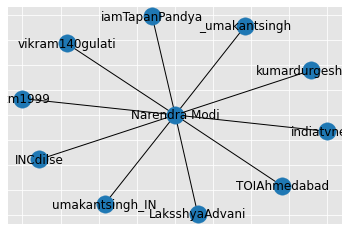

In [ ]:
nx.draw_networkx(G)


In [ ]:
G = nx.from_pandas_edgelist(rslt_df, 
                            source='User', 
                            target='Emotion')

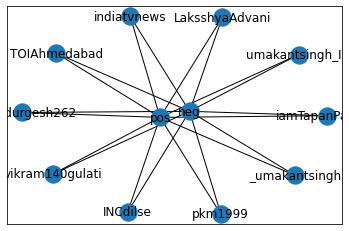

In [ ]:
nx.draw_networkx(G)

In [ ]:
G.nodes()

NodeView(('pkm1999', 'neg', 'umakantsingh_IN', 'kumardurgesh262', 'pos', 'INCdilse', 'indiatvnews', 'vikram140gulati', 'LaksshyaAdvani', '_umakantsingh', 'iamTapanPandya', 'TOIAhmedabad'))

In [ ]:
G = nx.from_pandas_edgelist(rslt_df, 
                            source='User', 
                            target='target',edge_attr='Emotion')

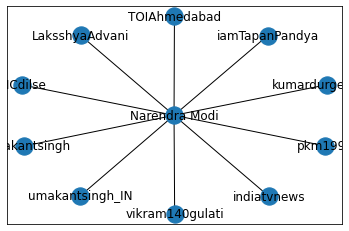

In [ ]:
nx.draw_networkx(G)

In [ ]:
G.edges(data=True)

EdgeDataView([('pkm1999', 'Narendra Modi', {'Emotion': 'neg'}), ('Narendra Modi', 'umakantsingh_IN', {'Emotion': 'pos'}), ('Narendra Modi', 'kumardurgesh262', {'Emotion': 'neg'}), ('Narendra Modi', 'INCdilse', {'Emotion': 'neg'}), ('Narendra Modi', 'indiatvnews', {'Emotion': 'pos'}), ('Narendra Modi', 'vikram140gulati', {'Emotion': 'neg'}), ('Narendra Modi', 'LaksshyaAdvani', {'Emotion': 'pos'}), ('Narendra Modi', '_umakantsingh', {'Emotion': 'neg'}), ('Narendra Modi', 'iamTapanPandya', {'Emotion': 'pos'}), ('Narendra Modi', 'TOIAhmedabad', {'Emotion': 'pos'})])

In [ ]:
nx.degree_centrality(G)

{'pkm1999': 0.1,
 'Narendra Modi': 1.0,
 'umakantsingh_IN': 0.1,
 'kumardurgesh262': 0.1,
 'INCdilse': 0.1,
 'indiatvnews': 0.1,
 'vikram140gulati': 0.1,
 'LaksshyaAdvani': 0.1,
 '_umakantsingh': 0.1,
 'iamTapanPandya': 0.1,
 'TOIAhmedabad': 0.1}

In [ ]:
nx.closeness_centrality(G)

In [ ]:
df2

,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...,pos
1,1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...,pos
2,2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,pos
...,...,...,...,...,...
14256,14256,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",pos
14257,14257,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,neg
14258,14258,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,neg
14259,14259,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,neg


In [ ]:
df2["target"] = pd.Series(["Rahul Gandhi" for x in range(len(df2.index))])

In [ ]:
df2

,Unnamed: 0,Date,User,Tweet,Emotion,target
0,0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...,pos,Rahul Gandhi
1,1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...,pos,Rahul Gandhi
2,2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg,Rahul Gandhi
3,3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",pos,Rahul Gandhi
4,4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,pos,Rahul Gandhi
...,...,...,...,...,...,...
14256,14256,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",pos,Rahul Gandhi
14257,14257,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,neg,Rahul Gandhi
14258,14258,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,neg,Rahul Gandhi
14259,14259,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,neg,Rahul Gandhi


In [ ]:
df2.to_csv("rahulfinal.csv",index=None)

In [ ]:
df2["User"].value_counts()

pkm1999            114
kumardurgesh262     79
iamTapanPandya      68
vikram140gulati     60
iamkaranbachani     58
                  ... 
KartikeyaGoel4       1
rishabh1123          1
MgGuggari            1
Lakhimal2            1
Sunnysweet16         1
Name: User, Length: 7865, dtype: int64

In [ ]:
## top10users contains list of top10 users who tweeted the most 
top10users=df2['User'].value_counts().index.tolist()[:10]

top10users

['pkm1999',
 'kumardurgesh262',
 'iamTapanPandya',
 'vikram140gulati',
 'iamkaranbachani',
 'roarDworld',
 'umakantsingh_IN',
 'stocks_in',
 'asarpotar',
 'SandipGhose']

In [ ]:
rslt_df = df2[df2['User'].isin(top10users)]

In [ ]:
rslt_df

,Unnamed: 0,Date,User,Tweet,Emotion,target
6,6,2019-05-18 17:45:45+00:00,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,neg,Rahul Gandhi
27,27,2019-05-18 08:53:22+00:00,umakantsingh_IN,"#MuteModi, it wrong, it #Modi3.0 for 2024 as ...",neg,Rahul Gandhi
29,29,2019-05-18 08:18:40+00:00,pkm1999,@rupasubramanya @narendramodi @AmitShah @Rahul...,neg,Rahul Gandhi
46,46,2019-05-18 04:38:16+00:00,umakantsingh_IN,@MamataOfficial @yadavakhilesh @Mayawati @Arvi...,neg,Rahul Gandhi
48,48,2019-05-18 04:34:54+00:00,kumardurgesh262,"@RahulGandhi Sir, I pray to you as a #BigBroth...",pos,Rahul Gandhi
...,...,...,...,...,...,...
14007,14007,2019-01-08 11:59:41+00:00,roarDworld,@RahulGandhi u will not decide if #NarendraMod...,neg,Rahul Gandhi
14041,14041,2019-01-07 04:58:19+00:00,roarDworld,@kashyap9991 @ads7506 @RahulGandhi @DarshanaJa...,neg,Rahul Gandhi
14107,14107,2019-01-04 13:40:10+00:00,roarDworld,@INCIndia @nsitharaman @RahulGandhi If guys do...,neg,Rahul Gandhi
14109,14109,2019-01-04 13:22:51+00:00,roarDworld,@RahulGandhi why u prove urself a buffoon? \n#...,neg,Rahul Gandhi


In [ ]:
G2 = nx.from_pandas_edgelist(rslt_df, 
                            source='User', 
                            target='target')

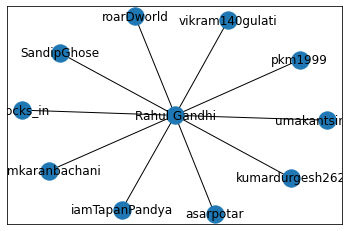

In [ ]:
nx.draw_networkx(G2)

In [ ]:
G2 = nx.from_pandas_edgelist(rslt_df, 
                            source='User', 
                            target='Emotion')

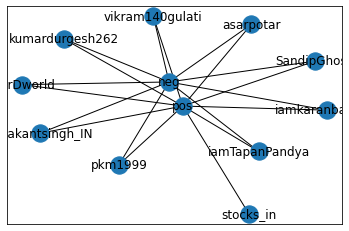

In [ ]:
nx.draw_networkx(G2)

In [ ]:
G2.edges(data=True)

EdgeDataView([('SandipGhose', 'neg', {}), ('SandipGhose', 'pos', {}), ('neg', 'umakantsingh_IN', {}), ('neg', 'pkm1999', {}), ('neg', 'vikram140gulati', {}), ('neg', 'iamTapanPandya', {}), ('neg', 'roarDworld', {}), ('neg', 'asarpotar', {}), ('neg', 'iamkaranbachani', {}), ('neg', 'kumardurgesh262', {}), ('umakantsingh_IN', 'pos', {}), ('pkm1999', 'pos', {}), ('kumardurgesh262', 'pos', {}), ('pos', 'asarpotar', {}), ('pos', 'iamTapanPandya', {}), ('pos', 'vikram140gulati', {}), ('pos', 'iamkaranbachani', {}), ('pos', 'roarDworld', {}), ('pos', 'stocks_in', {})])

In [ ]:
nx.degree_centrality(G2)

{'SandipGhose': 0.18181818181818182,
 'neg': 0.8181818181818182,
 'umakantsingh_IN': 0.18181818181818182,
 'pkm1999': 0.18181818181818182,
 'kumardurgesh262': 0.18181818181818182,
 'pos': 0.9090909090909092,
 'vikram140gulati': 0.18181818181818182,
 'asarpotar': 0.18181818181818182,
 'iamTapanPandya': 0.18181818181818182,
 'roarDworld': 0.18181818181818182,
 'iamkaranbachani': 0.18181818181818182,
 'stocks_in': 0.09090909090909091}

In [ ]:
nx.closeness_centrality(G2)

{'SandipGhose': 0.55,
 'neg': 0.7857142857142857,
 'umakantsingh_IN': 0.55,
 'pkm1999': 0.55,
 'kumardurgesh262': 0.55,
 'pos': 0.9166666666666666,
 'vikram140gulati': 0.55,
 'asarpotar': 0.55,
 'iamTapanPandya': 0.55,
 'roarDworld': 0.55,
 'iamkaranbachani': 0.55,
 'stocks_in': 0.5}